## This python notebook is to demostrate a very basic idea behing a recommender system

Credit https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d

In [6]:
import pandas as pd
import numpy as np
import warnings

In [22]:
## Load the data from https://grouplens.org/datasets/movielens/

df = pd.read_csv('ml-latest-small/ratings.csv', sep=',', names=['user_id','item_id','rating','titmestamp'], skiprows = 1)

In [24]:
## Inspect the top 5 records

df.head()

,user_id,item_id,rating,titmestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
# Read in the movie titles

movie_titles = pd.read_csv('ml-latest-small/movies.csv', sep=',', names=['item_id', 'title', 'genres'], skiprows=1)

In [26]:
# Inspect the top 5 records of the movie titles

movie_titles.head()

,item_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
# Merge user and movie data into one dataframe

df = pd.merge(df, movie_titles, on='item_id')


,user_id,item_id,rating,titmestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [28]:
# Inspect the top 5 records of the combined data

df.head()

,user_id,item_id,rating,titmestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [29]:
# Brief statistical descriptions

df.describe()

,user_id,item_id,rating,titmestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [30]:
## Calculate average rating by title

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())



In [31]:
## Inspect the top 5 records of average ratings

ratings.head()


,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


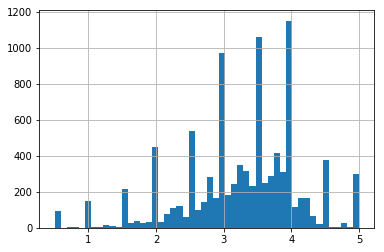

In [32]:
# Histogram of the average ratings

import matplotlib.pyplot as plt
%matplotlib inline

ratings['rating'].hist(bins=50)



In [34]:
# Calculate the number of ratings

ratings['number_of_ratings'] = df.groupby('title')['rating'].count()


In [35]:
# Inspect the top 5 records

ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


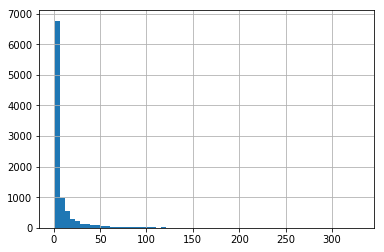

In [36]:
# Visualize number of ratings

ratings['number_of_ratings'].hist(bins=60)

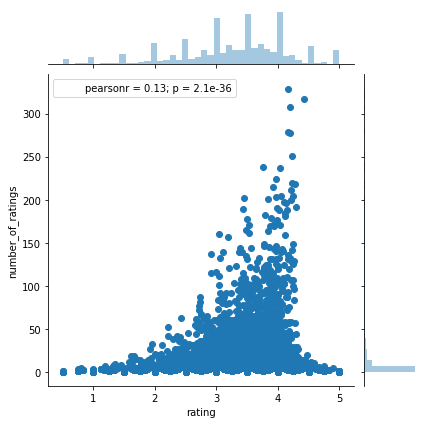

In [37]:
# Scatterplot to view the relationship between the rating and its count

import seaborn as sns

sns.jointplot(x ='rating', y = 'number_of_ratings', data = ratings)

In [38]:
# transform the data into a matrix of users and movie items

movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')


In [39]:
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# review the top 5

ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [42]:
## Calculate correlation matrix

AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']


In [51]:
movie_matrix['Air Force One (1997)']

user_id
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     4.0
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     3.0
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     2.0
29     NaN
30     NaN
      ... 
581    NaN
582    NaN
583    NaN
584    NaN
585    NaN
586    NaN
587    NaN
588    NaN
589    NaN
590    3.0
591    NaN
592    NaN
593    NaN
594    4.5
595    NaN
596    NaN
597    3.0
598    NaN
599    2.5
600    2.5
601    NaN
602    NaN
603    NaN
604    NaN
605    3.0
606    NaN
607    NaN
608    3.0
609    NaN
610    NaN
Name: Air Force One (1997), Length: 610, dtype: float64

In [45]:
AFO_user_rating.head()
contact_user_rating.head()

user_id
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Contact (1997), dtype: float64

In [47]:
# Calculate correlation between the two movies

similar_to_air_force_one = movie_matrix.corrwith(AFO_user_rating)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [55]:
similar_to_air_force_one

title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                          0.168459
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 0.086874
*batteries not included (1987)                                                       

In [56]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [61]:
similar_to_contact["'Til There Was You (1997)"]

nan

In [62]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()




,Correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640


In [63]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000


In [64]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])

In [65]:
corr_AFO.head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Cloverfield Lane (2016),0.192450,14
10 Items or Less (2006),-1.000000,3


In [66]:
corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [67]:
# product correlation of the movies that have at least 100 ratings

corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107
Apollo 13 (1995),0.536136,201
Twister (1996),0.511892,123
American Pie (1999),0.501064,103
"Truman Show, The (1998)",0.500529,125


In [68]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144
